In [2]:
# !pip install keras
# !pip instal tensorflow

In [3]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
wine_data = pd.read_csv("C:/Users/xinga/OneDrive/文档/GitHub/AI-Project/dataset/red-wine.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_data['quality'] = wine_data.quality.apply(lambda q:0 if q <=5 else 1)

In [6]:
# split the dataset into features X and Y
x = wine_data.drop('quality',axis=1)
y = wine_data['quality']

In [7]:
# Normalize the input feature
scaler = StandardScaler()   # scaler is an instance of the "StandardScaler" class
X = scaler.fit_transform(x) # this method is used to compute the mean and standard deviation of X and Y


In [8]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
# train_test_split randomly split the data into 2 parts
# 0.2 = 20% of data will be used in test
# random_state parameter is set to 42 to ensure that the random splitting is reproducible, commonly use 42 or 0

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


In [10]:
#create the keras model
model = Sequential()

In [11]:
model.add(Dense(64, input_dim = x_train.shape[1],activation = 'relu'))
# 64, specifies the number of neurons in the layer
#add method is use to add layer to the model
# input_dim = x_train.shape[1], set the input shape of the layer to the number of features in the train
# activation = 'relu' ,specifies the activation function to be used in the layer

In [12]:
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # output of this layer will be probability betweent 0 and 1

## Compile model

In [13]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#loss-- specifies the loss function to be used during training.
#optimizer - specifies the optimization algorithm
# metrics - specifies the evaluation metric to be used durning training and testing

model on training data

In [14]:
# train the model
history = model.fit(x_train,y_train,epochs=10, batch_size=64, validation_data=(x_test,y_test))
#fit method trains the model for a fixed number of epochs.
#batch = 32 - number of samples to be used in each batch durning training. usually set as power of 2
#

Epoch 1/10
20/20 [==============================] - 2s 21ms/step - loss: 1.2716 - accuracy: 0.4918 - val_loss: 0.6922 - val_accuracy: 0.5938
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6777 - accuracy: 0.5731 - val_loss: 0.6503 - val_accuracy: 0.6187
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6448 - accuracy: 0.6247 - val_loss: 0.6454 - val_accuracy: 0.6344
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6347 - accuracy: 0.6364 - val_loss: 0.6554 - val_accuracy: 0.6313
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6363 - accuracy: 0.6302 - val_loss: 0.6376 - val_accuracy: 0.6344
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6334 - accuracy: 0.6310 - val_loss: 0.6353 - val_accuracy: 0.6156
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6291 - accuracy: 0.6396 - val_loss: 0.6405 - val_accuracy: 0.6094
Epoch 8/10
20/20 [=

iteration size =  training example / batch size  = 1279/32 =39.97 round to 40

Evaluate model on test data

score = model.evaluate(x_test, y_test)
#evaluate method computes the loss value and any other specified metrics for the test data
#score will contain the computed loss value and the accuracy metric for the test data

Visualize Accuracy and Loss

In [15]:
import matplotlib.pyplot as plt

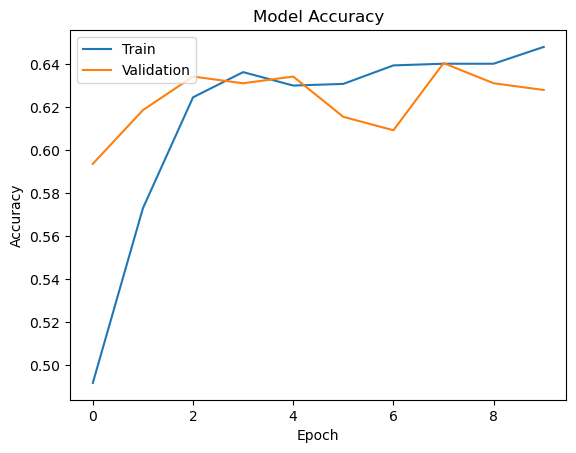

In [16]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy']) #plt.plot() is a function used to create a line plot of two or more arrays of data
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

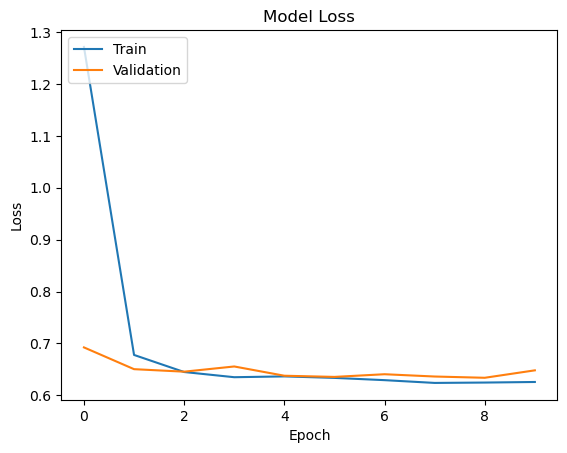

In [17]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

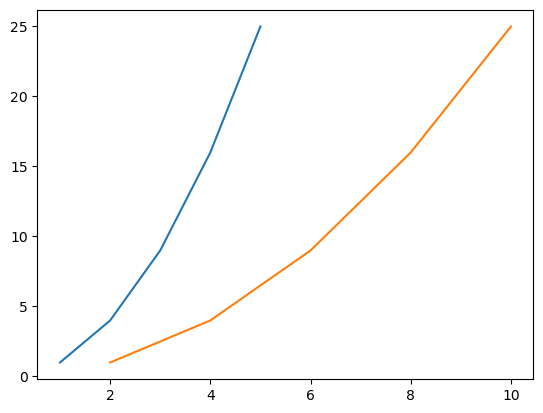

In [18]:
#example of plot function
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

a = [2, 4, 6, 8, 10]
b = [1, 4, 9, 16, 25]

plt.plot(x, y)
plt.plot(a,b)
plt.show()